<a href="https://colab.research.google.com/github/Anisha-Tasneem/Customer-Segmentation-and-Data-Analysis-using-Social-Media/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/499B-datasets/Dataset.csv')

# Encode categorical variables
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

label_encoder_city = LabelEncoder()
df['City Code'] = label_encoder_city.fit_transform(df['City Code'])

label_encoder_product = LabelEncoder()
df['Product Code'] = label_encoder_product.fit_transform(df['Product Code'])

# Separate features and target variable
X = df.drop(columns=['Customer ID', 'Customer Value'])
y = df['Customer Value']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [2]:
# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Import the necessary function
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Accuracy:", mae)

Epoch 1/50
125/125 - 9s - loss: 0.2239 - val_loss: 0.2143 - 9s/epoch - 72ms/step
Epoch 2/50
125/125 - 1s - loss: 0.2152 - val_loss: 0.2135 - 1s/epoch - 9ms/step
Epoch 3/50
125/125 - 2s - loss: 0.2142 - val_loss: 0.2135 - 2s/epoch - 12ms/step
Epoch 4/50
125/125 - 2s - loss: 0.2139 - val_loss: 0.2134 - 2s/epoch - 17ms/step
Epoch 5/50
125/125 - 1s - loss: 0.2132 - val_loss: 0.2136 - 1s/epoch - 9ms/step
Epoch 6/50
125/125 - 1s - loss: 0.2132 - val_loss: 0.2136 - 1s/epoch - 10ms/step
Epoch 7/50
125/125 - 1s - loss: 0.2129 - val_loss: 0.2140 - 1s/epoch - 8ms/step
Epoch 8/50
125/125 - 2s - loss: 0.2129 - val_loss: 0.2138 - 2s/epoch - 13ms/step
Epoch 9/50
125/125 - 1s - loss: 0.2125 - val_loss: 0.2133 - 1s/epoch - 9ms/step
Epoch 10/50
125/125 - 1s - loss: 0.2127 - val_loss: 0.2136 - 1s/epoch - 9ms/step
Epoch 11/50
125/125 - 2s - loss: 0.2123 - val_loss: 0.2136 - 2s/epoch - 14ms/step
Epoch 12/50
125/125 - 1s - loss: 0.2123 - val_loss: 0.2142 - 999ms/epoch - 8ms/step
Epoch 13/50
125/125 - 1s - l

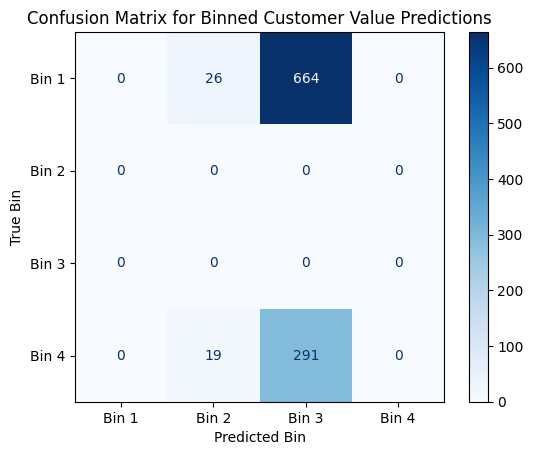

In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Binning the continuous values into discrete labels for confusion matrix
def binning_values(y, bins):
    return np.digitize(y, bins, right=True)

# Define bins based on the range of 'Customer Value'
bins = np.linspace(y.min(), y.max(), num=5)  # You can adjust the number of bins as needed

# Convert the true and predicted values into bins
y_test_binned = binning_values(y_test, bins)
y_pred_binned = binning_values(y_pred, bins)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[f'Bin {i}' for i in range(1, len(bins))])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binned Customer Value Predictions')
plt.xlabel('Predicted Bin')
plt.ylabel('True Bin')
plt.show()

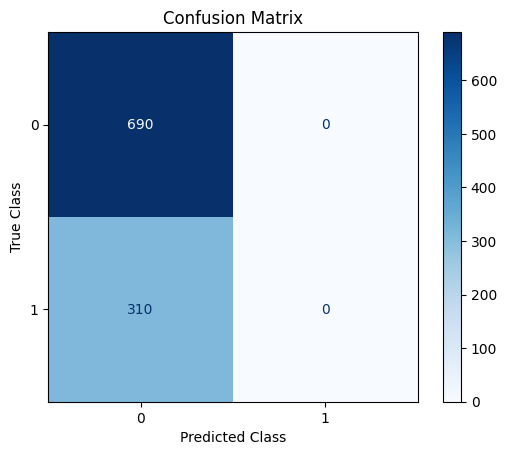

In [5]:
# Define bins based on the range of 'Customer Value'
bins = np.linspace(y.min(), y.max(), num=3)  # Two bins: one for class 0 and one for class 1

# Convert the true and predicted values into binary labels (0 or 1)
y_test_binary = np.where(y_test <= bins[1], 0, 1)
y_pred_binary = np.where(y_pred <= bins[1], 0, 1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["0", "1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [6]:
from sklearn.metrics import classification_report

# Calculate precision, recall, F1-score, and support
report = classification_report(y_test_binary, y_pred_binary, target_names=["Class 0", "Class 1"])

# Print the classification report
print(report)

              precision    recall  f1-score   support

     Class 0       0.69      1.00      0.82       690
     Class 1       0.00      0.00      0.00       310

    accuracy                           0.69      1000
   macro avg       0.34      0.50      0.41      1000
weighted avg       0.48      0.69      0.56      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


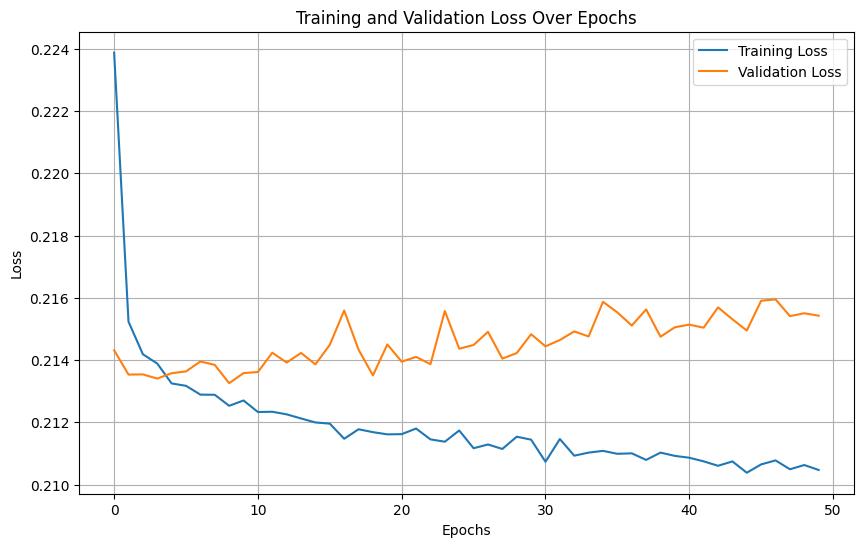

In [7]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by `model.fit()`

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()